In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
details = pd.read_csv(r"...\Ecommerce Customers.txt") # Thanks to Udemy for the dataset

In [42]:
details.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
details.shape

(500, 8)

In [5]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
# Exploratory Data Analysis

In [7]:
details.columns = details.columns.str.replace(' ', '_')

In [8]:
details.rename(columns = {'Avg._Session_Length' : 'Avg_Session_Length'}, inplace = True)

In [9]:
del details['Email']

In [10]:
del details['Address']

In [11]:
del details['Avatar']

In [12]:
details.isna().sum() # Checking for the missing Values

Avg_Session_Length      0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly_Amount_Spent     0
dtype: int64

In [13]:
details.duplicated().sum() # Checking for the duplicate records

0

In [14]:
# Univariate Analysis

In [15]:
details.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
# # Conclusion Drawn
# 1. Avg. Session Length - On an average a customer session is 33. Maximum time session by a customer is 36.19
# 2. Time on App- 25% of the customers are spending the time less than 11.38 on the app
# 3. Time on Website - 50% of the customers spend around 37 mins
# 4. Yearly Amount Spent - Maximum amount spent by a customer in a year - 765.51
# 5. Length Of Membership - 25% of the customer are having the membership between 4-6 years
# Also, time spending on website is way higher comparing to app in every factors

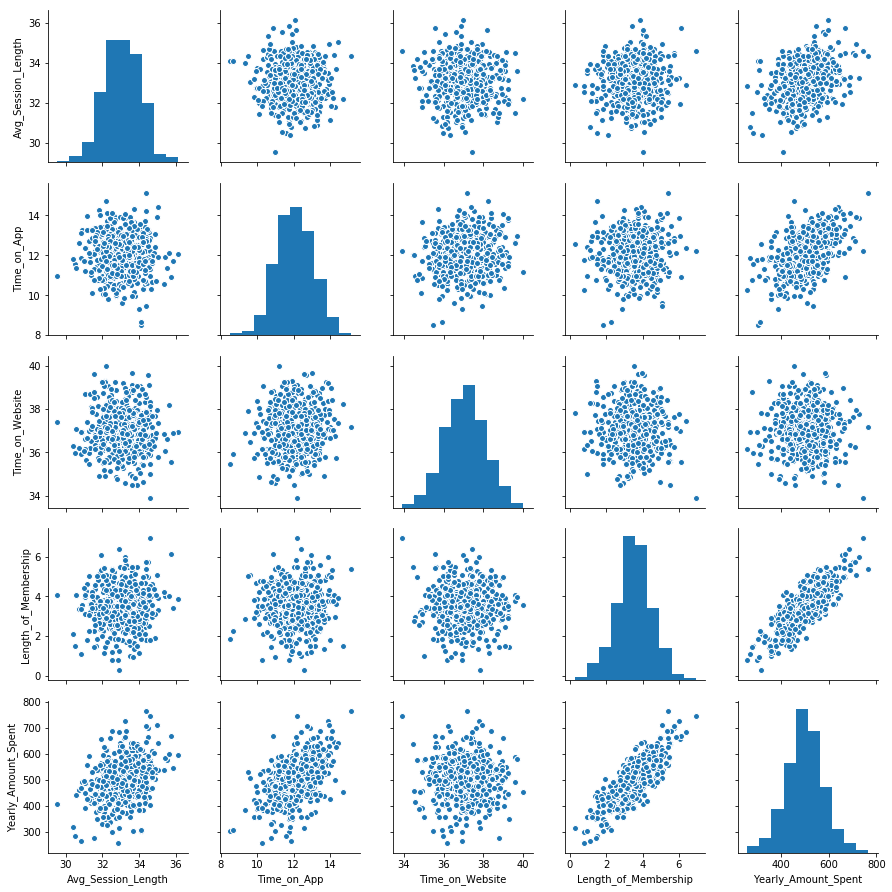

In [17]:
sns.pairplot(details)
plt.show()

In [18]:
# From above we can draw a conclusion that the Yearly Amount Spent and Length OF Membership are high;y correlated
# For better understanding

In [19]:
details.corr()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


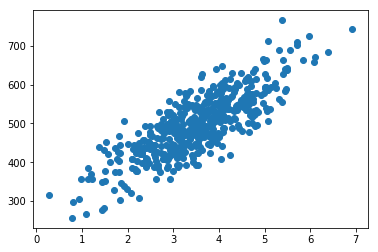

In [20]:
plt.scatter(details['Length_of_Membership'], details['Yearly_Amount_Spent'])

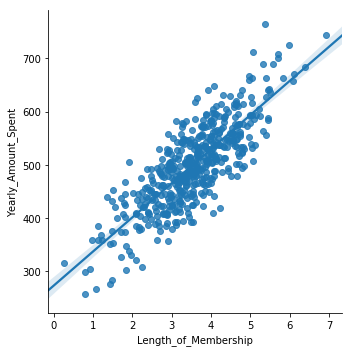

In [21]:
# So creating a linear models between length of membership and yearly amount spent
sns.lmplot(x = 'Length_of_Membership', y = 'Yearly_Amount_Spent', data = details)
plt.show()

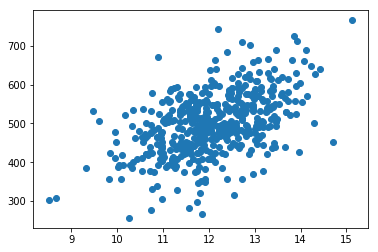

In [22]:
plt.scatter(details['Time_on_App'], details['Yearly_Amount_Spent']) # some correlation we can see here too
plt.show()

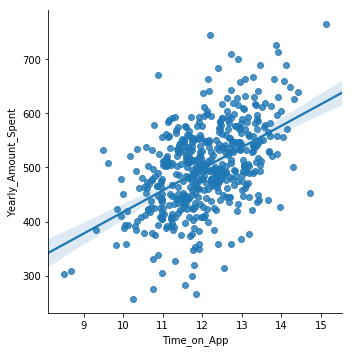

In [23]:
# So creating a linear models between time on app and yearly amount spent
sns.lmplot(x = 'Time_on_App', y = 'Yearly_Amount_Spent', data= details)

In [24]:
# Now its time to get the training and test dataset 


In [25]:
X = details[['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']]

In [26]:
X.shape

(500, 4)

In [27]:
y = details['Yearly_Amount_Spent']

In [28]:
y.shape

(500,)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
# Running the model

In [32]:
import statsmodels.formula.api as sm

In [33]:
model = sm.ols('Yearly_Amount_Spent~Avg_Session_Length+Time_on_App+Time_on_Website+Length_of_Membership', data = details).fit()

In [34]:
lm = model.summary()

In [35]:
print(lm)

                             OLS Regression Results                            
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                         23:24:38   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -

# Conclusion Drawn from Above Table

## 98% variability in Yearly Amount Spent was based on the independent variables considered in the model 
## Avg_Session_Length+Time_on_App+Time_on_Website+Length_of_Membership
## Fix all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.73 total amount spent.
## Fix all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.70 total amount spent.
## Fix all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.43 total amount spent.
## Fix all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.57 total amount spent.

# Time on App is much more significnt than the time investing on the website, so its on the company should give extra focus on website interface 
# so to make user friendly and robust

In [36]:
pred = model.predict(X_test)

In [37]:
# sns.lmplot(x = pred, y = y_test, data = 'details')

Text(0,0.5,'Predicted Value')

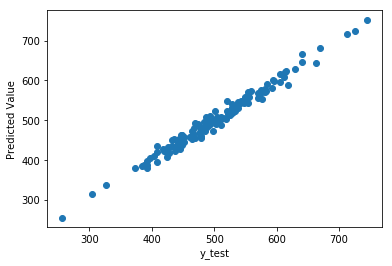

In [38]:
plt.scatter(y_test, pred) # Here we can see that model is preety good
plt.xlabel('y_test')
plt.ylabel('Predicted Value')